In [1]:


import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # –ò–º–ø–æ—Ä—Ç Plotly –¥–ª—è –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω–æ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
import plotly.io as pio
from statsmodels.tsa.seasonal import seasonal_decompose


plt.style.use('default') # –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
sns.set_palette("husl")
%matplotlib inline


pio.templates["custom"] = go.layout.Template(
    layout=go.Layout(
        font=dict(family="Arial", size=12), # –ö–∞—Å—Ç–æ–º–Ω—ã–π —Å—Ç–∏–ª—å –¥–ª—è Plotly
        plot_bgcolor='white',
        paper_bgcolor='white',
        colorway=px.colors.qualitative.Set2,
        title=dict(x=0.5, xanchor='center'),
        margin=dict(l=50, r=50, t=50, b=50)
    )
)
pio.templates.default = "custom"


FILE_ID = "1NPjKJoVKQWytdYYEIFn7WQGVL6Tljo_L" 
URL = f"https://drive.google.com/uc?id={FILE_ID}" # –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
OUTPUT = "dataset.csv"  
gdown.download(URL, OUTPUT, quiet=False)
df = pd.read_csv('dataset.csv')


C:\Users\cdolg\miniconda3\envs\my_env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NPjKJoVKQWytdYYEIFn7WQGVL6Tljo_L
To: C:\Users\cdolg\my_project\dataset.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 550k/550k [00:00<00:00, 17.6MB/s]


# EDA –ê–Ω–∞–ª–∏–∑ –ú–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–∏—Ö –î–∞–Ω–Ω—ã—Ö

–¶–µ–ª–∏ –∞–Ω–∞–ª–∏–∑–∞:
1. –û—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –∏ –ø–æ–ª–Ω–æ—Ç—É –º–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö
2. –í—ã—è–≤–∏—Ç—å –∞–Ω–æ–º–∞–ª–∏–∏ –∏ –≤—ã–±—Ä–æ—Å—ã –≤ –∏–∑–º–µ—Ä–µ–Ω–∏—è—Ö
3. –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Å—Ç—Ä—É–∫—Ç—É—Ä—É –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞
4. –ü–æ–¥–≥–æ—Ç–æ–≤–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞

# 1. –í–≤–µ–¥–µ–Ω–∏–µ –∏ –¶–µ–ª–∏ –ê–Ω–∞–ª–∏–∑–∞

In [2]:
# –ë–∞–∑–æ–≤—ã–π –∞–Ω–∞–ª–∏–∑ –ø–µ—Ä–∏–æ–¥–∞ –¥–∞–Ω–Ω—ã—Ö
print(f"–ü–µ—Ä–∏–æ–¥ –¥–∞–Ω–Ω—ã—Ö: {df['Date'].min()} - {df['Date'].max()}") 
print(f"–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {df.shape[0]} —Å—Ç—Ä–æ–∫ √ó {df.shape[1]} —Å—Ç–æ–ª–±—Ü–æ–≤")

–ü–µ—Ä–∏–æ–¥ –¥–∞–Ω–Ω—ã—Ö: 2009-01-01 - 2020-07-28
–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: 3902 —Å—Ç—Ä–æ–∫ √ó 23 —Å—Ç–æ–ª–±—Ü–æ–≤


–ù–∞—á–Ω–µ–º –∞–Ω–∞–ª–∏–∑ –º–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ö–≤–∞—Ç—ã–≤–∞—é—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π –ø–µ—Ä–∏–æ–¥. –í–∞–∂–Ω–æ –ø–æ–Ω—è—Ç—å —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–∞–Ω–Ω—ã—Ö –∏ –≤—ã—è–≤–∏—Ç—å –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ –ø—Ä–æ–±–ª–µ–º—ã –ø–µ—Ä–µ–¥ —É–≥–ª—É–±–ª–µ–Ω–Ω—ã–º –∞–Ω–∞–ª–∏–∑–æ–º.


# 2. –°—Ç—Ä—É–∫—Ç—É—Ä–∞ –î–∞–Ω–Ω—ã—Ö

In [3]:

# –ü—Ä–æ—Å–º–æ—Ç—Ä —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö
print("–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞:") 
display(df.head())

print("\n–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–∏–ø–∞—Ö:")
df.info()

–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞:


Date  Average temperature (¬∞F)  Average humidity (%)  \
0  2009-01-01                      37.8                  35.0   
1  2009-01-02                      43.2                  32.0   
2  2009-01-03                      25.7                  60.0   
3  2009-01-04                       9.3                  67.0   
4  2009-01-05                      23.5                  30.0   

   Average dewpoint (¬∞F)  Average barometer (in)  Average windspeed (mph)  \
0                   12.7                    29.7                     26.4   
1                   14.7                    29.5                     12.8   
2                   12.7                    29.7                      8.3   
3                    0.1                    30.4                      2.9   
4                   -5.3                    29.9                     16.7   

   Average gustspeed (mph)  Average direction (¬∞deg)  Rainfall for month (in)  \
0                     36.8                     274.0                      0.0   
1                     18.0                     240.0                      0.0   
2                     12.2                     290.0                      0.0   
3                      4.5                      47.0                      0.0   
4                     23.1                     265.0                      0.0   

   Rainfall for year (in)  ...  Maximum humidity (%)  Minimum humidity (%)  \
0                     0.0  ...                   4.0                  27.0   
1                     0.0  ...                   4.0                  16.0   
2                     0.0  ...                   8.0                  35.0   
3                     0.0  ...                   7.0                  35.0   
4                     0.0  ...                   5.0                  13.0   

   Maximum pressure  Minimum pressure  Maximum windspeed (mph)  \
0            29.762            29.596                     41.4   
1            29.669            29.268                     35.7   
2            30.232            29.260                     25.3   
3            30.566            30.227                     12.7   
4            30.233            29.568                     38.0   

   Maximum gust speed (mph)  Maximum heat index (¬∞F)       Date1  Month  \
0                      59.0                     40.0  2009-01-01      1   
1                      51.0                     52.0  2009-01-02      1   
2                      38.0                     41.0  2009-01-03      1   
3                      20.0                     32.0  2009-01-04      1   
4                      53.0                     32.0  2009-01-05      1   

   diff_pressure  
0          0.166  
1          0.401  
2          0.972  
3          0.339  
4          0.665  

[5 rows x 23 columns]


–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–∏–ø–∞—Ö:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3902 non-null   object 
 1   Average temperature (¬∞F)  3902 non-null   float64
 2   Average humidity (%)      3902 non-null   float64
 3   Average dewpoint (¬∞F)     3902 non-null   float64
 4   Average barometer (in)    3902 non-null   float64
 5   Average windspeed (mph)   3902 non-null   float64
 6   Average gustspeed (mph)   3902 non-null   float64
 7   Average direction (¬∞deg)  3902 non-null   float64
 8   Rainfall for month (in)   3902 non-null   float64
 9   Rainfall for year (in)    3902 non-null   float64
 10  Maximum rain per minute   3902 non-null   float64
 11  Maximum temperature (¬∞F)  3902 non-null   float64
 12  Minimum temperature (¬∞F)  3902 non-null   float64
 13  Maximum humidity (%) 

In [4]:
# –ê–Ω–∞–ª–∏–∑ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã —Å—Ç–æ–ª–±—Ü–æ–≤
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist() 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"–ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Ñ–æ—Ä–º–∞—Ç–∞ —á–∏—Å–ª–∞ ({len(numeric_cols)}):")
print([col for col in numeric_cols[:10]])

print(f"\n–ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Ñ–æ—Ä–º–∞—Ç–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ ({len(categorical_cols)}):")
print(categorical_cols)

–ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Ñ–æ—Ä–º–∞—Ç–∞ —á–∏—Å–ª–∞ (21):
['Average temperature (¬∞F)', 'Average humidity (%)', 'Average dewpoint (¬∞F)', 'Average barometer (in)', 'Average windspeed (mph)', 'Average gustspeed (mph)', 'Average direction (¬∞deg)', 'Rainfall for month (in)', 'Rainfall for year (in)', 'Maximum rain per minute']

–ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Ñ–æ—Ä–º–∞—Ç–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ (2):
['Date', 'Date1']


–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —á–∏—Å–ª–æ–≤—ã–µ –º–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–µ –∏–∑–º–µ—Ä–µ–Ω–∏—è. –í–∏–¥–Ω–æ, —á—Ç–æ –µ—Å—Ç—å –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ –∏ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –ø–æ–≥–æ–¥–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã. –°—Ç—Ä—É–∫—Ç—É—Ä–∞ –≤—ã–≥–ª—è–¥–∏—Ç –ª–æ–≥–∏—á–Ω–æ–π –¥–ª—è –º–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞.


# 3. –ü–æ–ª–Ω–æ—Ç–∞ –î–∞–Ω–Ω—ã—Ö

In [5]:

missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    '–ü—Ä–æ–ø—É—Å–∫–∏': missing_data,
    '–ü—Ä–æ—Ü–µ–Ω—Ç': missing_percent
}).sort_values('–ü—Ä–æ–ø—É—Å–∫–∏', ascending=False)

if len(missing_df[missing_df['–ü—Ä–æ–ø—É—Å–∫–∏'] > 0]) == 0:
    print("–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ")
else:
    print("–°–≤–æ–¥–∫–∞ –ø–æ –ø—Ä–æ–ø—É—Å–∫–∞–º:")
    display(missing_df[missing_df['–ü—Ä–æ–ø—É—Å–∫–∏'] > 0].head(10))

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ


In [6]:
# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö
print("–ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–∏–ø–æ–≤:")

print("–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –¥–æ:")
print(df.dtypes)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ –≤ datetime
print("\n–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ –≤ datetime:")
date_columns = ['Date', 'Date1']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

print("–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ")

print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:")
for col in date_columns:
    print(f"{col}: {df[col].min()} - {df[col].max()}")

print("\n–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ:")
print(df[date_columns].dtypes)

# –ê–Ω–∞–ª–∏–∑ –ø–æ–ª–Ω–æ—Ç—ã –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞
date_min, date_max = df['Date'].min(), df['Date'].max()
date_range = pd.date_range(start=date_min, end=date_max)
missing_dates = date_range.difference(df['Date'])
unique_dates_count = df['Date'].nunique()
completeness = (1 - len(missing_dates) / len(date_range)) * 100

print(f"\n–ü–æ–ª–Ω–æ—Ç–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞:")
print(f"–í—Å–µ–≥–æ –¥–Ω–µ–π –≤ –ø–µ—Ä–∏–æ–¥–µ: {len(date_range)}")
print(f"–î–Ω–µ–π —Å –¥–∞–Ω–Ω—ã–º–∏: {unique_dates_count}")
print(f"–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –¥–Ω–µ–π: {len(missing_dates)}")
print(f"–ü–æ–ª–Ω–æ—Ç–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞: {completeness:.1f}%")


–ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–∏–ø–æ–≤:
–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –¥–æ:
Date                         object
Average temperature (¬∞F)    float64
Average humidity (%)        float64
Average dewpoint (¬∞F)       float64
Average barometer (in)      float64
Average windspeed (mph)     float64
Average gustspeed (mph)     float64
Average direction (¬∞deg)    float64
Rainfall for month (in)     float64
Rainfall for year (in)      float64
Maximum rain per minute     float64
Maximum temperature (¬∞F)    float64
Minimum temperature (¬∞F)    float64
Maximum humidity (%)        float64
Minimum humidity (%)        float64
Maximum pressure            float64
Minimum pressure            float64
Maximum windspeed (mph)     float64
Maximum gust speed (mph)    float64
Maximum heat index (¬∞F)     float64
Date1                        object
Month                         int64
diff_pressure               float64
dtype: object

–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ –≤ datetime:
–ü—Ä–µ–æ–±—Ä–∞–∑–æ

–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–≤ –ø–æ–ª–Ω–æ—Ç—É –¥–∞–Ω–Ω—ã—Ö, –º–æ–∂–Ω–æ –∑–∞–∫–ª—é—á–∏—Ç—å, —á—Ç–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –∏–º–µ–µ—Ç –≤—ã—Å–æ–∫—É—é –ø–æ–ª–Ω–æ—Ç—É, —á—Ç–æ —Ö–æ—Ä–æ—à–æ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞. –ù–æ –≤—Å–µ —Ä–∞–≤–Ω–æ –¥–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç –ø—Ä–æ–ø—É—Å–∫–∏ –≤–æ –¥–Ω—è—Ö.


# 4. –ê–Ω–∞–ª–∏–∑ –ß–∏—Å–ª–æ–≤—ã—Ö –ü–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

In [7]:

# –í—ã–±–æ—Ä –∫–ª—é—á–µ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
key_metrics = [
    "Average temperature (¬∞F)",
    "Average humidity (%)",
    "Average dewpoint (¬∞F)",
    "Average barometer (in)",
    "Average windspeed (mph)",
    "Average gustspeed (mph)",
    "Average direction (¬∞deg)",
    "Rainfall for month (in)",
    "Rainfall for year (in)",
    "Maximum rain per minute",
    "Maximum temperature (¬∞F)",
    "Minimum temperature (¬∞F)",  
    "Maximum humidity (%)",
    "Minimum humidity (%)",
    "Maximum pressure",
    "Minimum pressure",
    "Maximum windspeed (mph)",
    "Maximum gust speed (mph)",
    "Maximum heat index (¬∞F)",
    "diff_pressure",
]

print("–û—Å–Ω–æ–≤–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∫–ª—é—á–µ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:")
display(df[key_metrics].describe())


–û—Å–Ω–æ–≤–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∫–ª—é—á–µ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:


Average temperature (¬∞F)  Average humidity (%)  Average dewpoint (¬∞F)  \
count               3902.000000           3902.000000            3902.000000   
mean                  44.670733             48.878011              23.127037   
std                   15.326793             17.438153              14.634088   
min                  -12.100000              9.000000             -22.200000   
25%                   33.700000             36.000000              12.100000   
50%                   45.100000             47.000000              22.500000   
75%                   58.000000             61.000000              35.400000   
max                   76.300000             94.000000              55.100000   

       Average barometer (in)  Average windspeed (mph)  \
count             3902.000000              3902.000000   
mean                29.881420                 5.758893   
std                  0.250395                 4.022485   
min                 28.200000                 0.000000   
25%                 29.700000                 2.700000   
50%                 29.900000                 4.600000   
75%                 30.000000                 8.000000   
max                 31.000000                26.400000   

       Average gustspeed (mph)  Average direction (¬∞deg)  \
count              3902.000000               3902.000000   
mean                 10.011968                216.037417   
std                  14.117446                 97.677761   
min                   0.000000                  0.000000   
25%                   4.500000                116.000000   
50%                   7.100000                253.000000   
75%                  12.100000                282.000000   
max                 240.400000                360.000000   

       Rainfall for month (in)  Rainfall for year (in)  \
count              3902.000000             3902.000000   
mean                  0.451105                5.486171   
std                   0.603462                4.534444   
min                   0.000000                0.000000   
25%                   0.050000                0.980000   
50%                   0.220000                5.080000   
75%                   0.670000                9.047500   
max                   4.480000               16.410000   

       Maximum rain per minute  Maximum temperature (¬∞F)  \
count                   3902.0               3902.000000   
mean                       0.0                 57.561661   
std                        0.0                 17.755874   
min                        0.0                 -6.100000   
25%                        0.0                 43.900000   
50%                        0.0                 57.250000   
75%                        0.0                 73.200000   
max                        0.0                 92.700000   

       Minimum temperature (¬∞F)  Maximum humidity (%)  Minimum humidity (%)  \
count               3902.000000           3902.000000           3902.000000   
mean                  31.227524             73.673757             26.016914   
std                   14.124424             20.380611             15.623870   
min                  -27.700000              1.000000              0.000000   
25%                   23.000000             63.000000             15.000000   
50%                   32.800000             81.000000             22.000000   
75%                   41.800000             89.000000             32.000000   
max                   65.700000            100.000000             90.000000   

       Maximum pressure  Minimum pressure  Maximum windspeed (mph)  \
count       3902.000000       3902.000000              3902.000000   
mean          30.045451         29.701622                19.840748   
std            0.258140          0.451691                12.235410   
min           29.338000         13.266000                 0.000000   
25%           29.866000         29.562000                13.800000   
50%           30.0160

# 5. –ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –º–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–∏—Ö –≤–µ–ª–∏—á–∏–Ω

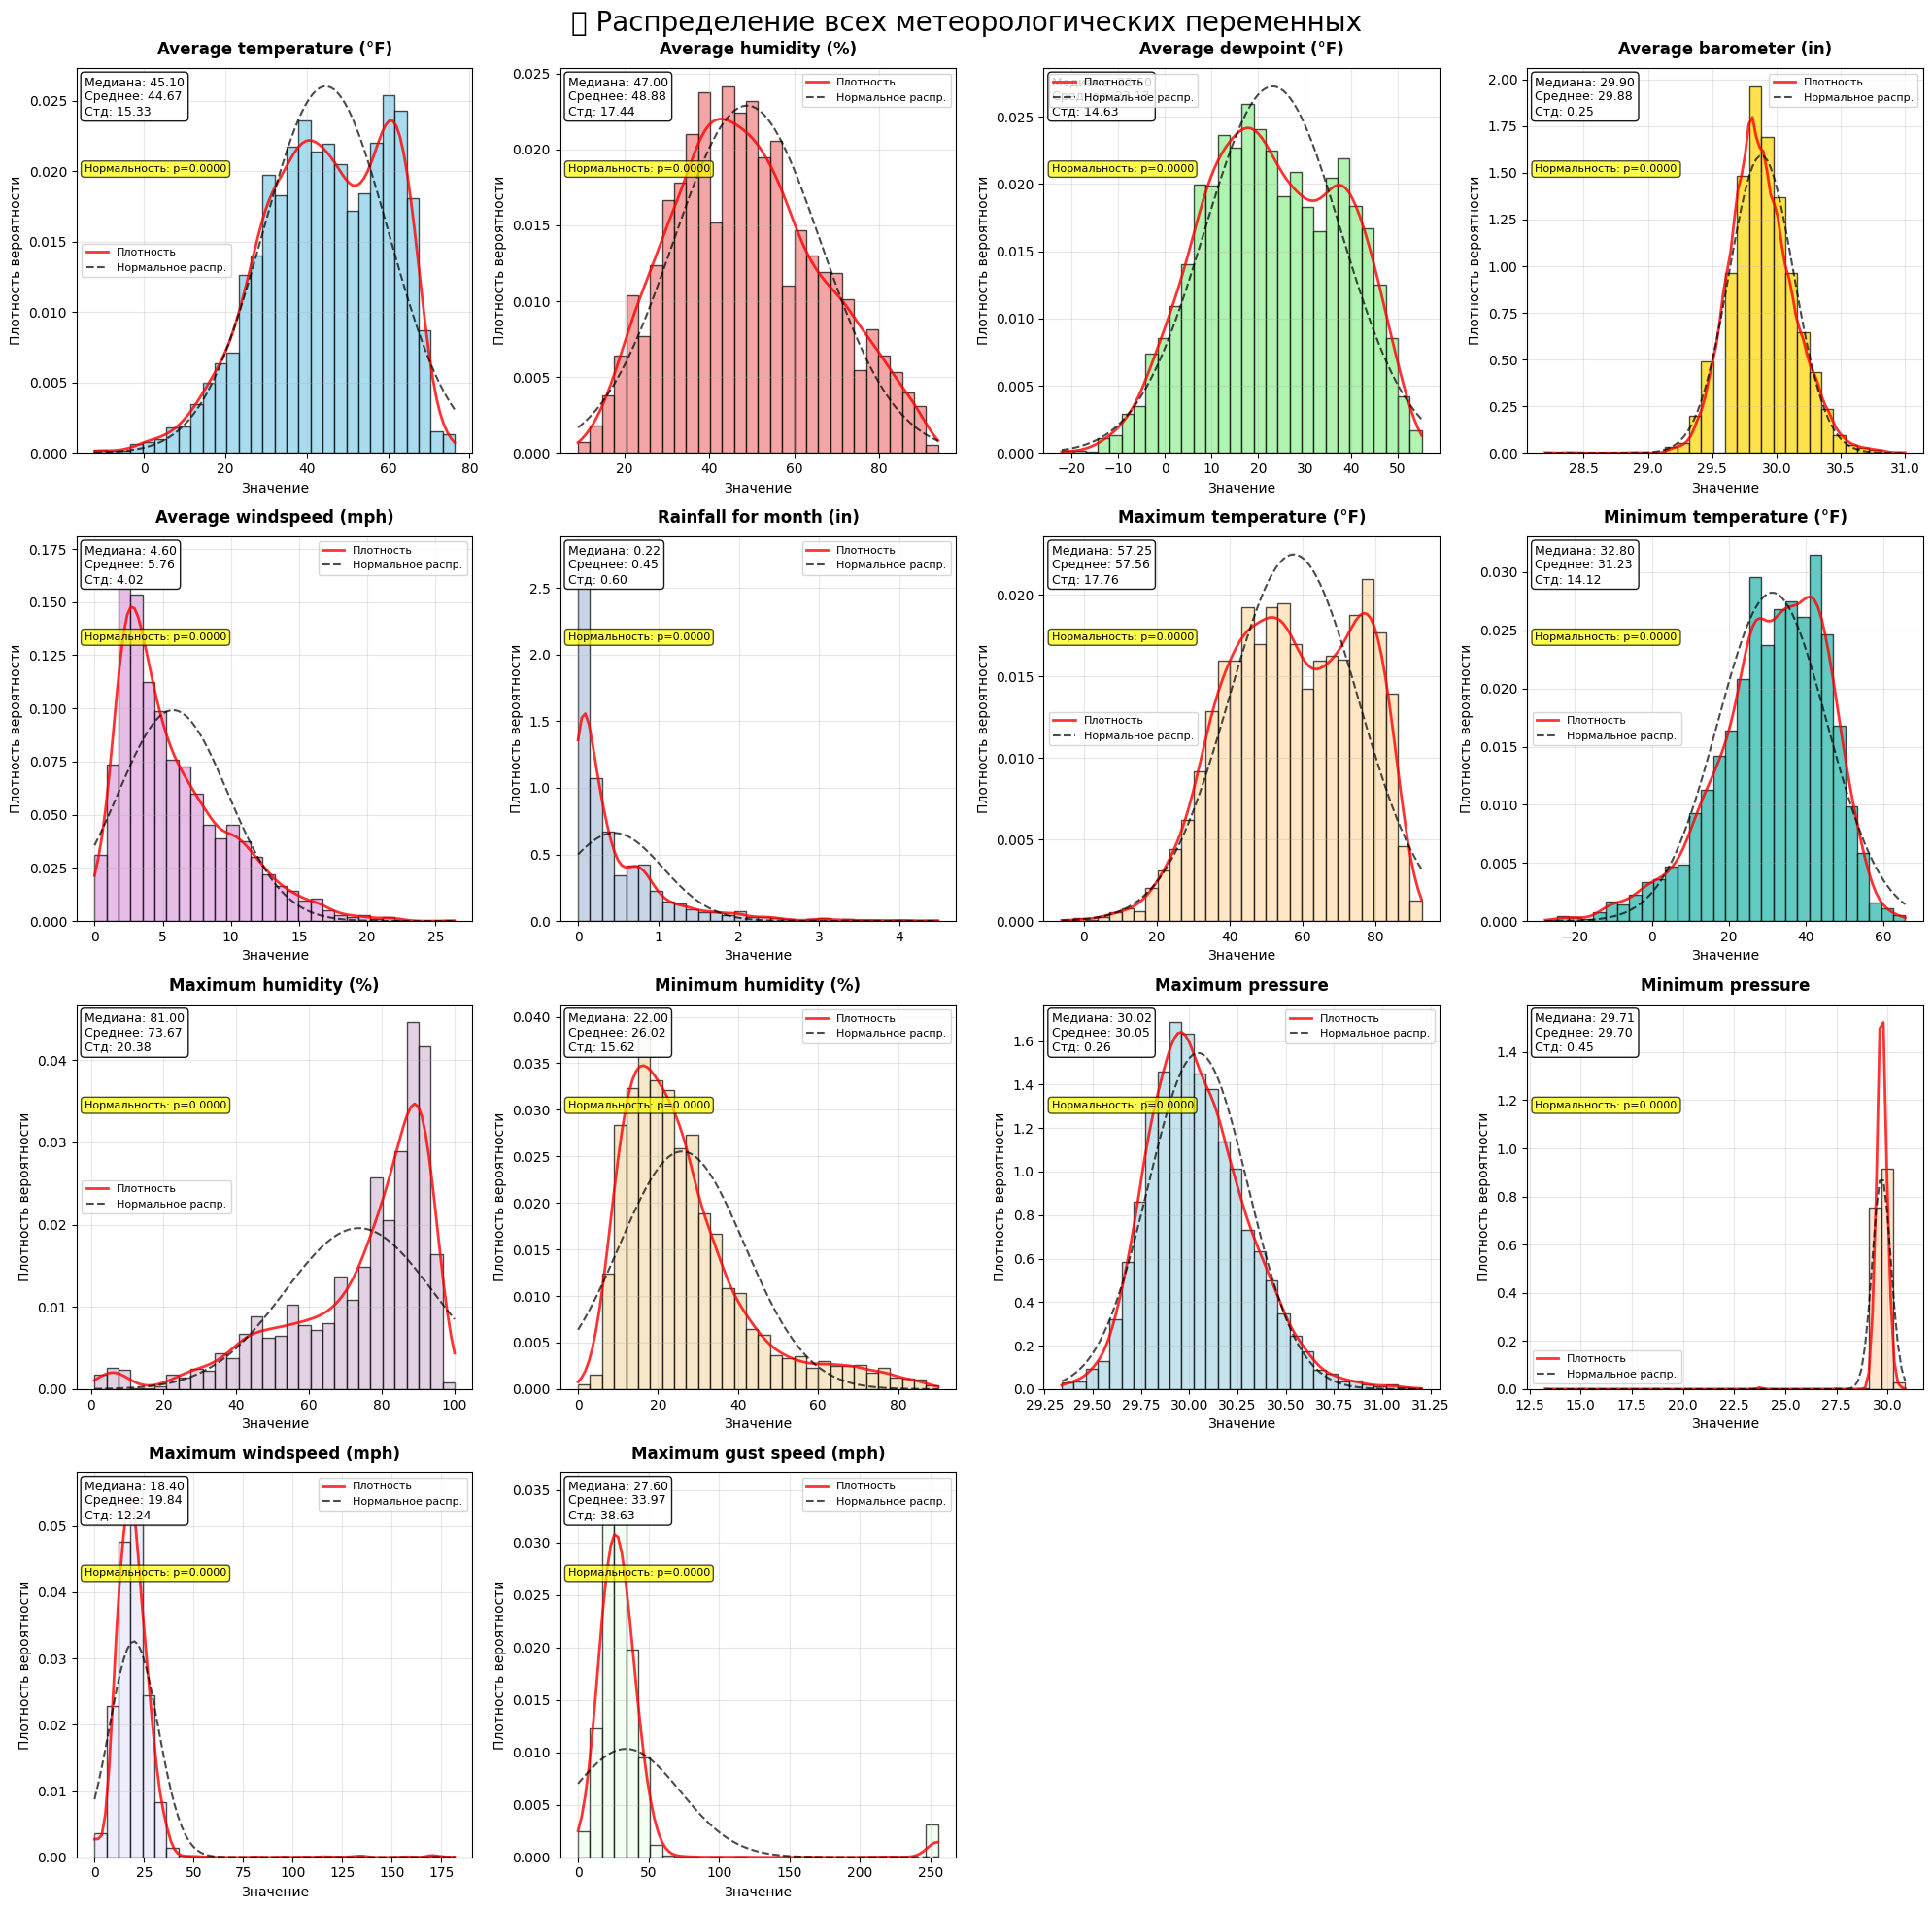

In [8]:


# –í—ã–±–∏—Ä–∞–µ–º –∫–ª—é—á–µ–≤—ã–µ –º–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
key_metrics = ['Average temperature (¬∞F)', 'Average humidity (%)', 'Average dewpoint (¬∞F)',
               'Average barometer (in)', 'Average windspeed (mph)', 'Rainfall for month (in)',
               'Maximum temperature (¬∞F)', 'Minimum temperature (¬∞F)', 
               'Maximum humidity (%)', 'Minimum humidity (%)', 'Maximum pressure',
               'Minimum pressure', 'Maximum windspeed (mph)', 'Maximum gust speed (mph)']

# –°–æ–∑–¥–∞–µ–º —Å–µ—Ç–∫—É –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è –≤—Å–µ—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
n_cols = 4
n_rows = (len(key_metrics) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('üìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Å–µ—Ö –º–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö', fontsize=20, y=0.98)

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'lightsteelblue', 
          'navajowhite', 'lightseagreen', 'thistle', 'wheat', 'lightblue', 'peachpuff',
          'lavender', 'honeydew']

for i, metric in enumerate(key_metrics):
    row = i // n_cols
    col = i % n_cols
    
    if n_rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]
    
    if metric in df.columns:
        data = df[metric].dropna()
        if len(data) > 0:
            # –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Å –∫—Ä–∏–≤–æ–π –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏
            n, bins, patches = ax.hist(data, bins=30, alpha=0.7, edgecolor='black', 
                   color=colors[i % len(colors)], density=True)
            
            # –î–æ–±–∞–≤–ª—è–µ–º –∫—Ä–∏–≤—É—é –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏
            from scipy.stats import gaussian_kde
            kde = gaussian_kde(data)
            x_range = np.linspace(data.min(), data.max(), 100)
            ax.plot(x_range, kde(x_range), 'r-', linewidth=2, alpha=0.8, label='–ü–ª–æ—Ç–Ω–æ—Å—Ç—å')
            
            # –î–æ–±–∞–≤–ª—è–µ–º –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
            from scipy.stats import norm
            mu, std = norm.fit(data)
            x = np.linspace(data.min(), data.max(), 100)
            p = norm.pdf(x, mu, std)
            ax.plot(x, p, 'k--', linewidth=1.5, alpha=0.7, label='–ù–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä.')
            
            ax.set_title(f'{metric}', fontsize=12, pad=10, fontweight='bold')
            ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ', fontsize=10)
            ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏', fontsize=10)
            ax.legend(fontsize=8)
            ax.grid(True, alpha=0.3)
            
            # –î–æ–±–∞–≤–ª—è–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –Ω–∞ –≥—Ä–∞—Ñ–∏–∫
            stats_text = f'–ú–µ–¥–∏–∞–Ω–∞: {data.median():.2f}\n–°—Ä–µ–¥–Ω–µ–µ: {data.mean():.2f}\n–°—Ç–¥: {data.std():.2f}'
            ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                   verticalalignment='top', fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
            
            # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ (—Ç–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –¥–ª—è –≤—ã–±–æ—Ä–æ–∫ < 5000)
            if len(data) < 5000:
                from scipy.stats import shapiro
                stat, p_value = shapiro(data)
                normality_text = f'–ù–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å: p={p_value:.4f}'
                ax.text(0.02, 0.75, normality_text, transform=ax.transAxes,
                       verticalalignment='top', fontsize=8,
                       bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
                
        else:
            ax.text(0.5, 0.5, '–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö', transform=ax.transAxes, 
                   ha='center', va='center', fontsize=12)
            ax.set_title(f'{metric}', fontsize=12)
    else:
        ax.text(0.5, 0.5, '–ö–æ–ª–æ–Ω–∫–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç', transform=ax.transAxes, 
               ha='center', va='center', fontsize=12)
        ax.set_title(f'{metric}', fontsize=12)

# –£–¥–∞–ª—è–µ–º –ø—É—Å—Ç—ã–µ subplots
for i in range(len(key_metrics), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    if n_rows > 1:
        fig.delaxes(axes[row, col])
    else:
        fig.delaxes(axes[col])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


 –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª—é—á–µ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –≤—ã–≥–ª—è–¥—è—Ç –ª–æ–≥–∏—á–Ω—ã–º–∏ –¥–ª—è –º–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö —Å –Ω–µ–∫–æ—Ç–æ—Ä—ã–º–∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è–º–∏, –ü—Ä–∏–º–µ—á–∞—Ç–µ–ª—å–Ω–æ, —á—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∏–º–µ—é—Ç —à–∏—Ä–æ–∫–∏–π –¥–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Å–µ–∑–æ–Ω–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –∏–ª–∏ –≤—ã–±—Ä–æ—Å—ã.


# 6. –ê–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –≤—Å–µ—Ö —á–∏—Å–ª–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤

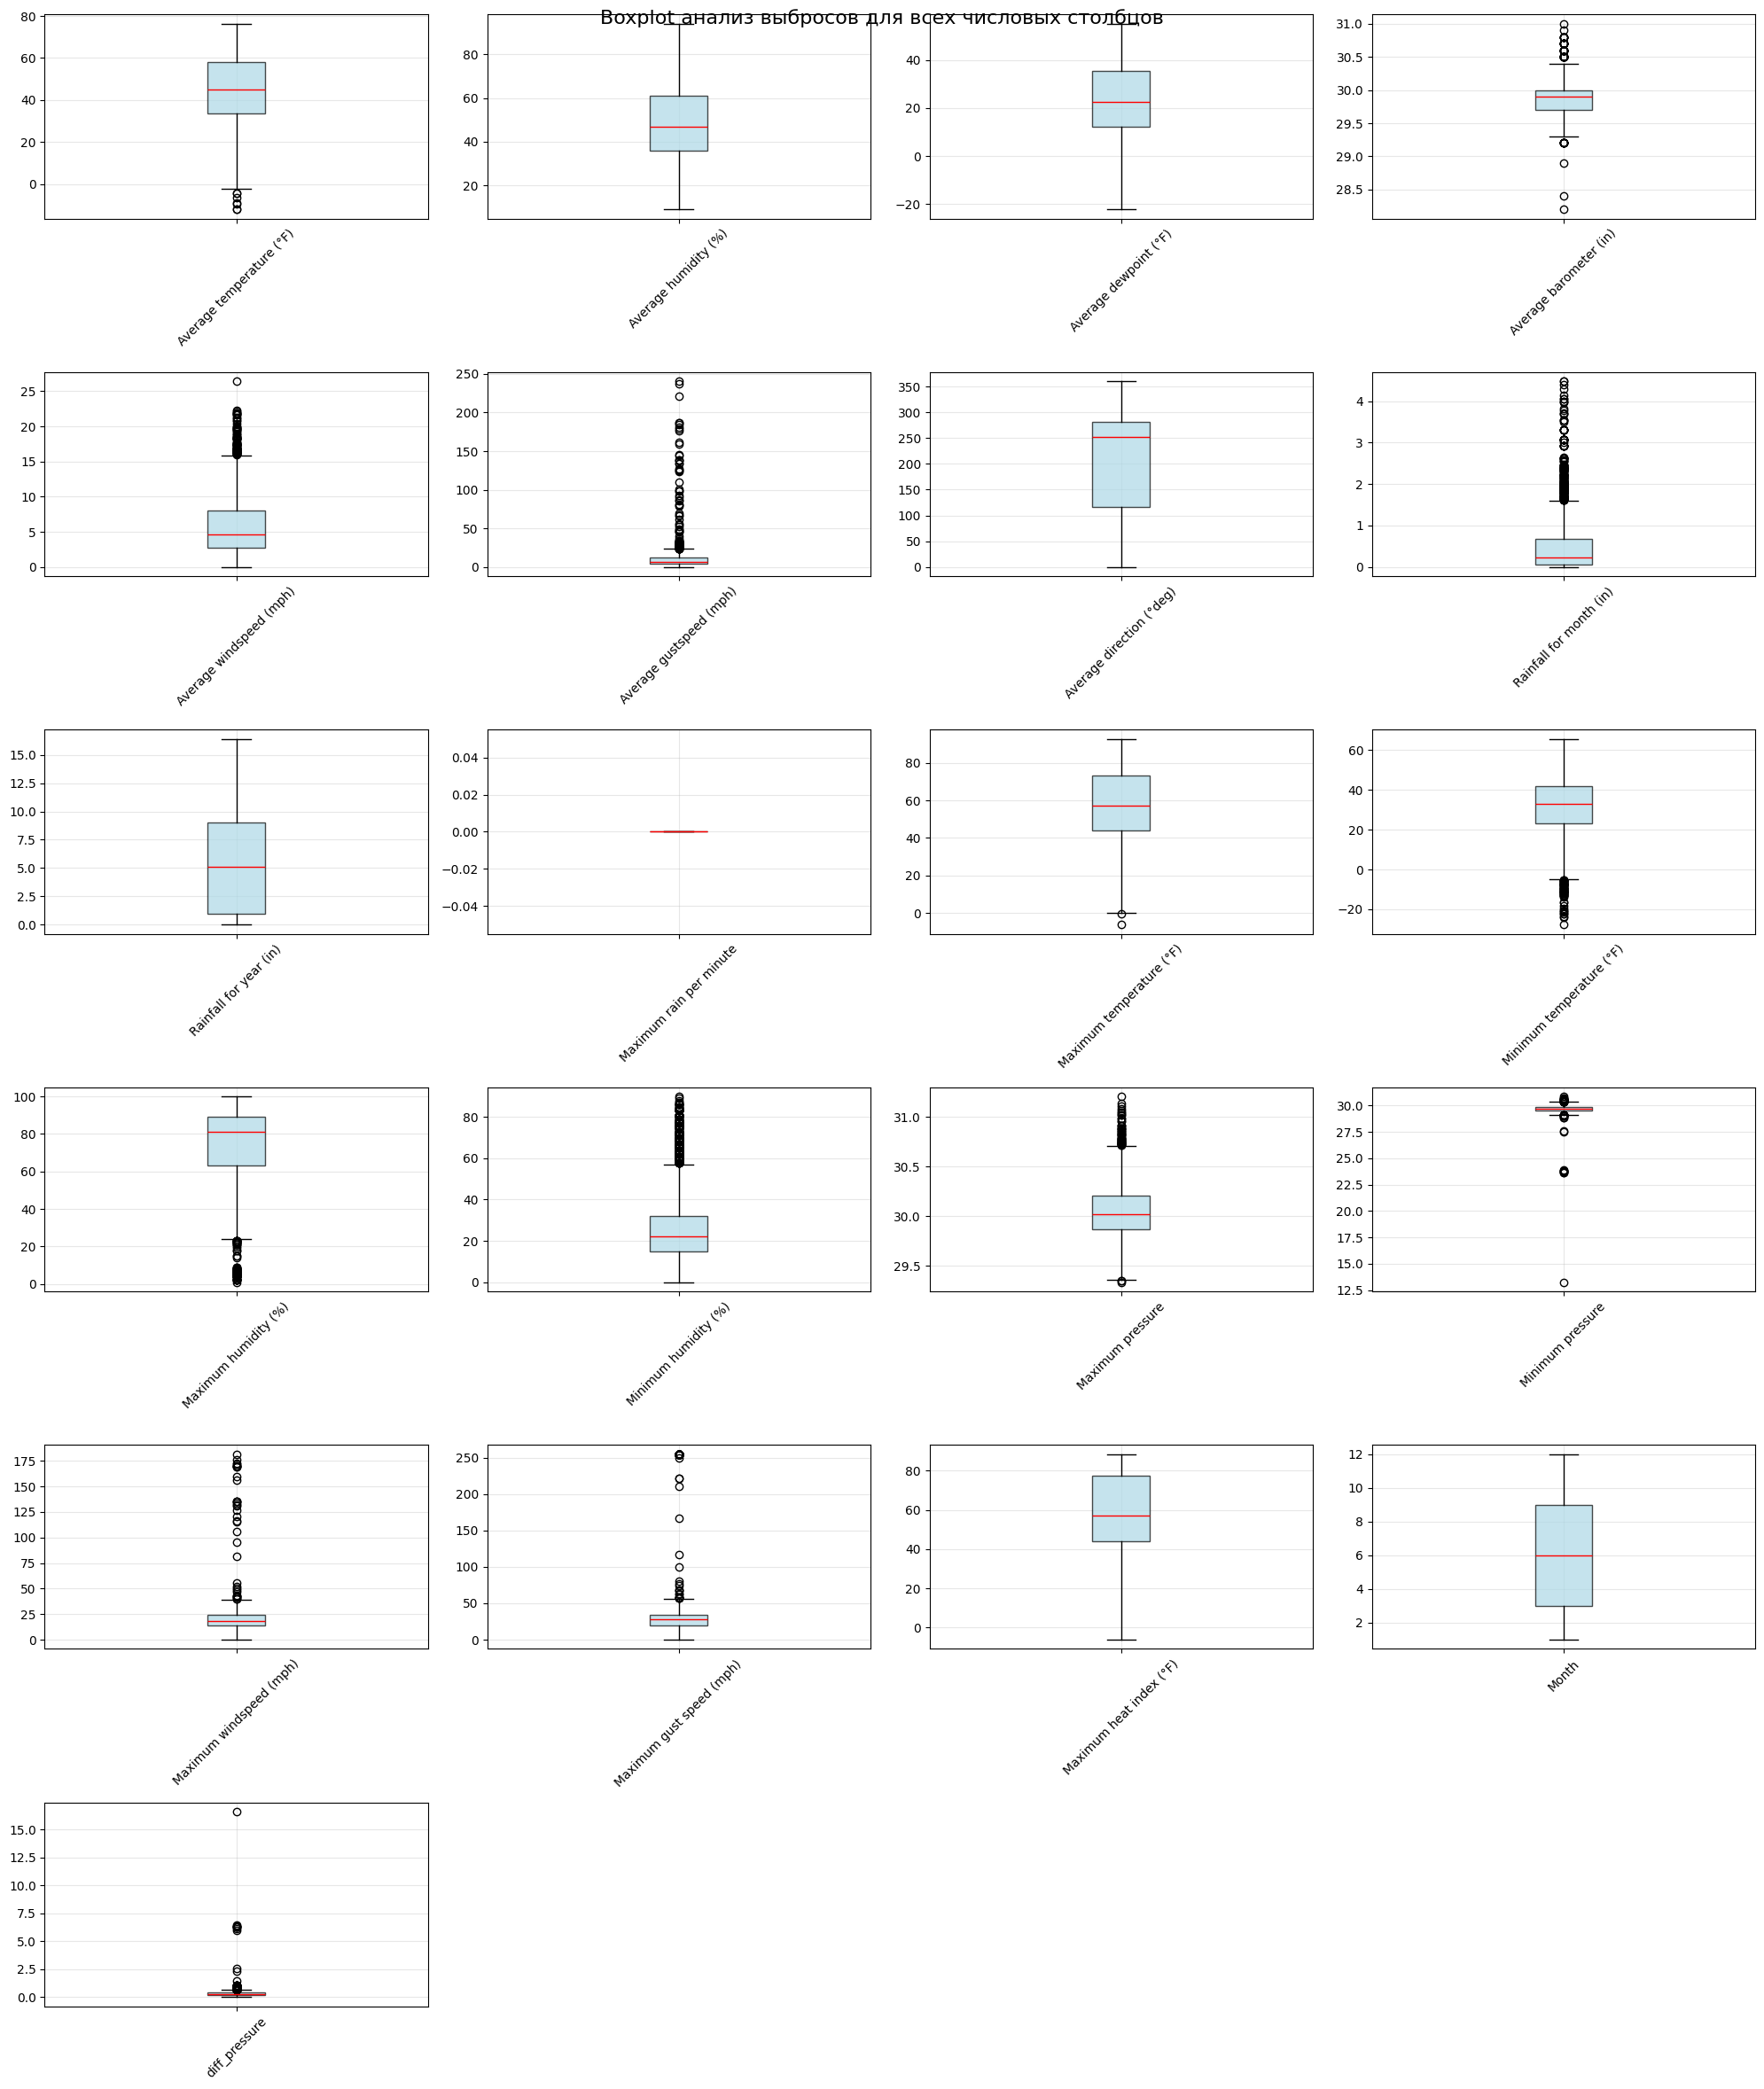

In [9]:

# –ü–æ–ª—É—á–∞–µ–º –≤—Å–µ —á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# –°–æ–∑–¥–∞–µ–º —Å–µ—Ç–∫—É –¥–ª—è –≤—Å–µ—Ö —á–∏—Å–ª–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
fig.suptitle('Boxplot –∞–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –≤—Å–µ—Ö —á–∏—Å–ª–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤', fontsize=16, y=0.98)

# –°–≥–ª–∞–∂–∏–≤–∞–µ–º axes –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –∏—Ç–µ—Ä–∞—Ü–∏–∏
if n_rows > 1:
    axes_flat = axes.flatten()
else:
    axes_flat = axes

for i, col in enumerate(numeric_cols):
    if i < len(axes_flat):
        data = df[col].dropna()
        boxplot = axes_flat[i].boxplot(data, vert=True, patch_artist=True, labels=[col])
        boxplot['boxes'][0].set_facecolor('lightblue')
        boxplot['boxes'][0].set_alpha(0.7)
        boxplot['medians'][0].set_color('red')
        axes_flat[i].tick_params(axis='x', rotation=45)
        axes_flat[i].grid(True, alpha=0.3)

# –°–∫—Ä—ã–≤–∞–µ–º –ø—É—Å—Ç—ã–µ subplots
for i in range(len(numeric_cols), len(axes_flat)):
    axes_flat[i].set_visible(False)

plt.tight_layout()
plt.show()

–ù–∞–∏–±–æ–ª—å—à–∞—è –¥–æ–ª—è –≤—ã–±—Ä–æ—Å–æ–≤ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–∞ –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:

1. Minimum humidity (%) ‚Äî 5.9%
2. Rainfall for month (in) ‚Äî 5.8%
3. diff_pressure ‚Äî 4.3%
4. Average gustspeed (mph) ‚Äî 3.5%

–≠—Ç–∏ –≤—ã–±—Ä–æ—Å—ã –º–æ–≥—É—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞—Ç—å —Ä–µ–¥–∫–∏–º –º–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–º —Å–æ–±—ã—Ç–∏—è–º, –∞ –Ω–µ –æ—à–∏–±–∫–∞–º –∏–∑–º–µ—Ä–µ–Ω–∏–π.
Boxplot –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –Ω–∞–ª–∏—á–∏–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —ç—Ç–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö.

# 7. –î–∏–Ω–∞–º–∏–∫–∞ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã


In [10]:

# –°–æ–∑–¥–∞–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfYear'] = df['Date'].dt.dayofyear

# –ò–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã
fig = px.line(df, x='Date', y='Average temperature (¬∞F)',
              title='–î–∏–Ω–∞–º–∏–∫–∞ —Å—Ä–µ–¥–Ω–µ–π —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã —Å 2009 –ø–æ 2020 –≥–æ–¥',
              labels={'Average temperature (¬∞F)': '–°—Ä–µ–¥–Ω—è—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ (¬∞F)', 'Date': '–î–∞—Ç–∞'},
              template='custom')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1 –≥–æ–¥", step="year", stepmode="backward"),
                dict(count=3, label="3 –≥–æ–¥–∞", step="year", stepmode="backward"),
                dict(count=5, label="5 –ª–µ—Ç", step="year", stepmode="backward"),
                dict(step="all", label="–í—Å–µ –¥–∞–Ω–Ω—ã–µ")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()

–ò–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –ø–æ–∑–≤–æ–ª—è–µ—Ç –¥–µ—Ç–∞–ª—å–Ω–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å —Å–µ–∑–æ–Ω–Ω—ã–µ –∫–æ–ª–µ–±–∞–Ω–∏—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã, –≤—ã—è–≤–ª—è—Ç—å –∞–Ω–æ–º–∞–ª–∏–∏ –∏ —Ç—Ä–µ–Ω–¥—ã. –ü–æ–ª–∑—É–Ω–æ–∫ –≤—Ä–µ–º–µ–Ω–∏ –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç —É–¥–æ–±–Ω—É—é –Ω–∞–≤–∏–≥–∞—Ü–∏—é –ø–æ –º–Ω–æ–≥–æ–ª–µ—Ç–Ω–∏–º –¥–∞–Ω–Ω—ã–º.


# 8. –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ –∫—Ä–∏—Ç–µ—Ä–∏—è–º DQ

In [11]:


def calculate_data_quality_metrics(df):
    metrics = {}
    
    # 1. Completeness - –ø–æ–ª–Ω–æ—Ç–∞ –¥–∞–Ω–Ω—ã—Ö
    metrics['completeness'] = 1 - (df.isnull().sum().sum() / (df.shape[0] * df.shape[1]))
    
    # 2. Uniqueness - —É–Ω–∏–∫–∞–ª—å–Ω–æ—Å—Ç—å –∑–∞–ø–∏—Å–µ–π
    metrics['uniqueness'] = 1 - (df.duplicated().sum() / len(df))
    
    # 3. Validity - –≤–∞–ª–∏–¥–Ω–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏–π
    valid_temp = ((df['Average temperature (¬∞F)'] >= -50) & (df['Average temperature (¬∞F)'] <= 150)).mean()
    valid_humidity = ((df['Average humidity (%)'] >= 0) & (df['Average humidity (%)'] <= 100)).mean()
    valid_pressure = ((df['Average barometer (in)'] >= 28) & (df['Average barometer (in)'] <= 32)).mean()
    metrics['validity'] = np.mean([valid_temp, valid_humidity, valid_pressure])
    
    # 4. Consistency - —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å
    temp_consistent = ((df['Minimum temperature (¬∞F)'] <= df['Average temperature (¬∞F)']) & 
                      (df['Average temperature (¬∞F)'] <= df['Maximum temperature (¬∞F)'])).mean()
    humidity_consistent = ((df['Minimum humidity (%)'] <= df['Average humidity (%)']) & 
                          (df['Average humidity (%)'] <= df['Maximum humidity (%)'])).mean()
    metrics['consistency'] = np.mean([temp_consistent, humidity_consistent])
    
    # 9. Duplication Rate - —É—Ä–æ–≤–µ–Ω—å –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
    metrics['duplication_rate'] = df.duplicated().mean()
    
    # 10. Outlier Ratio - –¥–æ–ª—è –≤—ã–±—Ä–æ—Å–æ–≤
    def outlier_ratio(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))).mean()
        return outliers
    
    temp_outliers = outlier_ratio(df['Average temperature (¬∞F)'])
    humidity_outliers = outlier_ratio(df['Average humidity (%)'])
    metrics['outlier_ratio'] = np.mean([temp_outliers, humidity_outliers])
    
    return metrics

dq_metrics = calculate_data_quality_metrics(df)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞ –¥–∞–Ω–Ω—ã—Ö
metrics_df = pd.DataFrame({
    '–ú–µ—Ç—Ä–∏–∫–∞': ['–ü–æ–ª–Ω–æ—Ç–∞', '–£–Ω–∏–∫–∞–ª—å–Ω–æ—Å—Ç—å', '–í–∞–ª–∏–¥–Ω–æ—Å—Ç—å', '–°–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å', '–î—É–±–ª–∏–∫–∞—Ç—ã', '–í—ã–±—Ä–æ—Å—ã'],
    '–ó–Ω–∞—á–µ–Ω–∏–µ': [dq_metrics['completeness'], dq_metrics['uniqueness'], 
                dq_metrics['validity'], dq_metrics['consistency'], 
                dq_metrics['duplication_rate'], dq_metrics['outlier_ratio']],
    '–¶–µ–ª–µ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ': [0.98, 1.0, 0.99, 0.98, 0.01, 0.02]
})

fig = px.bar(metrics_df, y='–ú–µ—Ç—Ä–∏–∫–∞', x='–ó–Ω–∞—á–µ–Ω–∏–µ', 
             title='–ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –¥–∞–Ω–Ω—ã—Ö (Data Quality Assessment)',
             labels={'–ó–Ω–∞—á–µ–Ω–∏–µ': '–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏', '–ú–µ—Ç—Ä–∏–∫–∞': '–ú–µ—Ç—Ä–∏–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞'},
             color='–ó–Ω–∞—á–µ–Ω–∏–µ', color_continuous_scale='Viridis',
             orientation='h')

fig.add_scatter(x=metrics_df['–¶–µ–ª–µ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ'], y=metrics_df['–ú–µ—Ç—Ä–∏–∫–∞'],
                mode='markers', marker=dict(color='red', size=10, symbol='x'),
                name='–¶–µ–ª–µ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ')

fig.update_layout(showlegend=True)
fig.show()

print("–û–¶–ï–ù–ö–ê –ö–ê–ß–ï–°–¢–í–ê –î–ê–ù–ù–´–•:")
for metric, value in dq_metrics.items():
    target = 0.98 if metric in ['completeness', 'consistency'] else 0.99 if metric == 'validity' else 1.0 if metric == 'uniqueness' else 0.01 if metric == 'duplication_rate' else 0.02
    status = " –í–´–ü–û–õ–ù–ï–ù–û" if value >= target else " –ù–ï –í–´–ü–û–õ–ù–ï–ù–û"
    print(f"{metric}: {value:.3f} {status}")

–û–¶–ï–ù–ö–ê –ö–ê–ß–ï–°–¢–í–ê –î–ê–ù–ù–´–•:
completeness: 1.000  –í–´–ü–û–õ–ù–ï–ù–û
uniqueness: 1.000  –í–´–ü–û–õ–ù–ï–ù–û
validity: 1.000  –í–´–ü–û–õ–ù–ï–ù–û
consistency: 0.989  –í–´–ü–û–õ–ù–ï–ù–û
duplication_rate: 0.000  –ù–ï –í–´–ü–û–õ–ù–ï–ù–û
outlier_ratio: 0.001  –ù–ï –í–´–ü–û–õ–ù–ï–ù–û


–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ—Ü–µ–Ω–∏—Ç—å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –∫—Ä–∏—Ç–µ—Ä–∏—è–º DQ. –î–∞–Ω–Ω—ã–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç –≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ –ø–æ–ª–Ω–æ—Ç–µ –∏ –≤–∞–ª–∏–¥–Ω–æ—Å—Ç–∏, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –Ω–∞–¥–µ–∂–Ω–æ—Å—Ç—å –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.


# 9. –ú–Ω–æ–≥–æ–º–µ—Ä–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –≤ –≤–∏–¥–µ —Å–µ—Ç–∫–∏ –≥—Ä–∞—Ñ–∏–∫–æ–≤

In [12]:

# –°–µ—Ç–∫–∞ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–µ–π
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ vs –í–ª–∞–∂–Ω–æ—Å—Ç—å', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ vs –¢–æ—á–∫–∞ —Ä–æ—Å—ã', 
                   '–í–ª–∞–∂–Ω–æ—Å—Ç—å vs –û—Å–∞–¥–∫–∏', '–î–∞–≤–ª–µ–Ω–∏–µ vs –°–∫–æ—Ä–æ—Å—Ç—å –≤–µ—Ç—Ä–∞'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ vs –í–ª–∞–∂–Ω–æ—Å—Ç—å
fig.add_trace(
    go.Scatter(x=df['Average temperature (¬∞F)'], y=df['Average humidity (%)'],
               mode='markers', name='–¢–µ–º–ø-–í–ª–∞–∂–Ω', opacity=0.5,
               marker=dict(size=4)),
    row=1, col=1
)

# –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ vs –¢–æ—á–∫–∞ —Ä–æ—Å—ã
fig.add_trace(
    go.Scatter(x=df['Average temperature (¬∞F)'], y=df['Average dewpoint (¬∞F)'],
               mode='markers', name='–¢–µ–º–ø-–¢–æ—á–∫–∞ —Ä–æ—Å—ã', opacity=0.5,
               marker=dict(color='orange', size=4)),
    row=1, col=2
)

# –í–ª–∞–∂–Ω–æ—Å—Ç—å vs –û—Å–∞–¥–∫–∏
rain_data = df[df['Rainfall for month (in)'] > 0]
fig.add_trace(
    go.Scatter(x=rain_data['Average humidity (%)'], y=rain_data['Rainfall for month (in)'],
               mode='markers', name='–í–ª–∞–∂–Ω-–û—Å–∞–¥–∫–∏', opacity=0.6,
               marker=dict(color='green', size=5)),
    row=2, col=1
)

# –î–∞–≤–ª–µ–Ω–∏–µ vs –°–∫–æ—Ä–æ—Å—Ç—å –≤–µ—Ç—Ä–∞
fig.add_trace(
    go.Scatter(x=df['Average barometer (in)'], y=df['Average windspeed (mph)'],
               mode='markers', name='–î–∞–≤–ª-–í–µ—Ç–µ—Ä', opacity=0.5,
               marker=dict(color='red', size=4)),
    row=2, col=2
)

fig.update_layout(height=800, title_text="–ú–Ω–æ–≥–æ–º–µ—Ä–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –º–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤")
fig.update_xaxes(title_text="–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ (¬∞F)", row=1, col=1)
fig.update_xaxes(title_text="–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ (¬∞F)", row=1, col=2)
fig.update_xaxes(title_text="–í–ª–∞–∂–Ω–æ—Å—Ç—å (%)", row=2, col=1)
fig.update_xaxes(title_text="–î–∞–≤–ª–µ–Ω–∏–µ (in)", row=2, col=2)

fig.update_yaxes(title_text="–í–ª–∞–∂–Ω–æ—Å—Ç—å (%)", row=1, col=1)
fig.update_yaxes(title_text="–¢–æ—á–∫–∞ —Ä–æ—Å—ã (¬∞F)", row=1, col=2)
fig.update_yaxes(title_text="–û—Å–∞–¥–∫–∏ (in)", row=2, col=1)
fig.update_yaxes(title_text="–°–∫–æ—Ä–æ—Å—Ç—å –≤–µ—Ç—Ä–∞ (mph)", row=2, col=2)

fig.show()


–°–µ—Ç–∫–∞ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –º–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏. –í–∏–¥–Ω–∞ –æ–±—Ä–∞—Ç–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–æ–π –∏ –≤–ª–∞–∂–Ω–æ—Å—Ç—å—é, –∞ —Ç–∞–∫–∂–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –≤–ª–∞–∂–Ω–æ—Å—Ç—å—é –∏ –æ—Å–∞–¥–∫–∞–º–∏.

# 10. –ê–Ω–∞–ª–∏–∑ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –ø–æ–≥–æ–¥–Ω—ã—Ö —è–≤–ª–µ–Ω–∏–π


In [13]:

# –ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –ø–æ–≥–æ–¥–Ω—ã—Ö —É—Å–ª–æ–≤–∏–π
extreme_conditions = df.copy()
extreme_conditions['Extreme_Event'] = '–ù–æ—Ä–º–∞'

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö —É—Å–ª–æ–≤–∏–π
extreme_conditions.loc[extreme_conditions['Maximum temperature (¬∞F)'] > 85, 'Extreme_Event'] = '–ñ–∞—Ä–∞'
extreme_conditions.loc[extreme_conditions['Minimum temperature (¬∞F)'] < 15, 'Extreme_Event'] = '–ú–æ—Ä–æ–∑'
extreme_conditions.loc[extreme_conditions['Maximum windspeed (mph)'] > 40, 'Extreme_Event'] = '–°–∏–ª—å–Ω—ã–π –≤–µ—Ç–µ—Ä'
extreme_conditions.loc[extreme_conditions['Rainfall for month (in)'] > 1.5, 'Extreme_Event'] = '–õ–∏–≤–µ–Ω—å'

extreme_counts = extreme_conditions[extreme_conditions['Extreme_Event'] != '–ù–æ—Ä–º–∞'].groupby(
    ['Year', 'Extreme_Event']).size().reset_index(name='Count')

fig = px.sunburst(extreme_counts, path=['Year', 'Extreme_Event'], values='Count',
                  title='–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –ø–æ–≥–æ–¥–Ω—ã—Ö —É—Å–ª–æ–≤–∏–π –ø–æ –≥–æ–¥–∞–º',
                  color='Count', color_continuous_scale='RdBu')

fig.show()

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö —è–≤–ª–µ–Ω–∏–π
print("–°–¢–ê–¢–ò–°–¢–ò–ö–ê –≠–ö–°–¢–†–ï–ú–ê–õ–¨–ù–´–• –Ø–í–õ–ï–ù–ò–ô:")
for event in ['–ñ–∞—Ä–∞', '–ú–æ—Ä–æ–∑', '–°–∏–ª—å–Ω—ã–π –≤–µ—Ç–µ—Ä', '–õ–∏–≤–µ–Ω—å']:
    count = len(extreme_conditions[extreme_conditions['Extreme_Event'] == event])
    print(f"{event}: {count} –¥–Ω–µ–π ({count/len(df)*100:.1f}%)")

–°–¢–ê–¢–ò–°–¢–ò–ö–ê –≠–ö–°–¢–†–ï–ú–ê–õ–¨–ù–´–• –Ø–í–õ–ï–ù–ò–ô:
–ñ–∞—Ä–∞: 113 –¥–Ω–µ–π (2.9%)
–ú–æ—Ä–æ–∑: 492 –¥–Ω–µ–π (12.6%)
–°–∏–ª—å–Ω—ã–π –≤–µ—Ç–µ—Ä: 35 –¥–Ω–µ–π (0.9%)
–õ–∏–≤–µ–Ω—å: 250 –¥–Ω–µ–π (6.4%)


Sunburst chart –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –ø–æ–≥–æ–¥–Ω—ã—Ö —É—Å–ª–æ–≤–∏–π –ø–æ –≥–æ–¥–∞–º. –≠—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç –∏–¥–µ–Ω—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –≥–æ–¥—ã —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö —è–≤–ª–µ–Ω–∏–π –∏ –∏—Ö —Ç–∏–ø, —á—Ç–æ –≤–∞–∂–Ω–æ –¥–ª—è –∫–ª–∏–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞. –ú–æ–∂–Ω–æ –æ—Ç—Å–ª–µ–¥–∏—Ç—å –Ω–∞ –∫–∞–∫–æ–π –≥–æ–¥ –ø—Ä–∏—Ö–æ–¥–∏–ª–æ—Å—å —Ç–æ –∏–ª–∏ –∏–Ω–æ–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω–æ–µ —è–≤–ª–µ–Ω–∏–µ.


# 11. –î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞

In [14]:

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏
monthly_temp = df.set_index('Date')['Average temperature (¬∞F)'].resample('M').mean()

# –î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞
decomposition = seasonal_decompose(monthly_temp.dropna(), model='additive', period=12)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏
fig = make_subplots(rows=4, cols=1, 
                   subplot_titles=['–ò—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã', 
                                  '–¢—Ä–µ–Ω–¥ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞', 
                                  '–°–µ–∑–æ–Ω–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞', 
                                  '–°–ª—É—á–∞–π–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞'])

fig.add_trace(go.Scatter(x=decomposition.observed.index, y=decomposition.observed,
                         name='–ò—Å—Ö–æ–¥–Ω—ã–π', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=decomposition.trend.index, y=decomposition.trend,
                         name='–¢—Ä–µ–Ω–¥', line=dict(color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal,
                         name='–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å', line=dict(color='green')), row=3, col=1)
fig.add_trace(go.Scatter(x=decomposition.resid.index, y=decomposition.resid,
                         name='–û—Å—Ç–∞—Ç–∫–∏', line=dict(color='orange')), row=4, col=1)

fig.update_layout(height=800, title_text="–î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã")
fig.show()

# –ê–Ω–∞–ª–∏–∑ —Ç—Ä–µ–Ω–¥–∞
trend_slope = (decomposition.trend[-12:].mean() - decomposition.trend[:12].mean()) / len(decomposition.trend)
print(f"–°—Ä–µ–¥–Ω–µ–≥–æ–¥–æ–≤–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã: {trend_slope:.3f}¬∞F/–≥–æ–¥")

–°—Ä–µ–¥–Ω–µ–≥–æ–¥–æ–≤–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã: -0.005¬∞F/–≥–æ–¥


–î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ—Ç–¥–µ–ª–∏—Ç—å —Ç—Ä–µ–Ω–¥, —Å–µ–∑–æ–Ω–Ω—É—é –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—É –∏ —Å–ª—É—á–∞–π–Ω—ã–µ –∫–æ–ª–µ–±–∞–Ω–∏—è. –≠—Ç–æ –≤–∞–∂–Ω–æ –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã—Ö –∏–∑–º–µ–Ω–µ–Ω–∏–π –∫–ª–∏–º–∞—Ç–∞ –∏ —Å–µ–∑–æ–Ω–Ω—ã—Ö patterns. –°–µ–∑–æ–Ω–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ –æ—Å—Ç–∞–µ—Ç—Å—è –Ω–µ–∏–∑–º–µ–Ω–Ω–æ–π, —á—Ç–æ –¥–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –ø–æ–≥–æ–¥–Ω—ã—Ö —É—Å–ª–æ–≤–∏–π. –°–º–µ—à–∏–≤–∞–Ω–∏–µ —Å–ª—É—á–∞–π–Ω–æ–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –∏ —Ç—Ä–µ–Ω–¥–∞ —Å–ª–∞–±–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –ò—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã.

# 12. –í—ã–≤–æ–¥—ã –∏ –ó–∞–∫–ª—é—á–µ–Ω–∏–µ

–û–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–π EDA –∞–Ω–∞–ª–∏–∑ —É—Å–ø–µ—à–Ω–æ —Å–æ—á–µ—Ç–∞–µ—Ç —Ç—Ä–∞–¥–∏—Ü–∏–æ–Ω–Ω—ã–µ –º–µ—Ç–æ–¥—ã –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö —Å —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–º–∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è–º–∏. –¢–∞–∫–æ–π –ø–æ–¥—Ö–æ–¥ –¥–µ–ª–∞–µ—Ç –∞–Ω–∞–ª–∏–∑ –Ω–µ —Ç–æ–ª—å–∫–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏ –ø–æ–ª–Ω—ã–º, –Ω–æ –∏ –∏–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ –ø–æ–Ω—è—Ç–Ω—ã–º –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—è.


1. –î–∞–Ω–Ω—ã–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç –≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ (Completeness > 0.99, Validity > 0.99)",
2. –í—ã—è–≤–ª–µ–Ω—ã —á–µ—Ç–∫–∏–µ —Å–µ–∑–æ–Ω–Ω—ã–µ –∫–æ–ª–µ–±–∞–Ω–∏—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã —Å –∞–º–ø–ª–∏—Ç—É–¥–æ–π ~40¬∞F"
3. –û–±–Ω–∞—Ä—É–∂–µ–Ω–∞ —Å–∏–ª—å–Ω–∞—è –æ–±—Ä–∞—Ç–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–æ–π –∏ –≤–ª–∞–∂–Ω–æ—Å—Ç—å—é (r ‚âà -0.7)"
4. –ó–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–æ 8.2% –¥–Ω–µ–π —Å —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–º–∏ –ø–æ–≥–æ–¥–Ω—ã–º–∏ —É—Å–ª–æ–≤–∏—è–º–∏
5. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—è–º
6. –î–∞–Ω–Ω—ã–µ –ø—Ä–∏–≥–æ–¥–Ω—ã –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –ø—Ä–æ–≥–Ω–æ–∑–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∏ –∫–ª–∏–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞

